# Import Libraries

In [2]:
import os
from PIL import Image, ImageEnhance
from PIL import ImageOps as Iops
from IPython.display import display 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import xml.etree.ElementTree as ET 
from collections import OrderedDict
import glob
from sklearn.model_selection import train_test_split
import cv2
from skimage.util import *
from PIL.ImageFilter import (
   BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EDGE_ENHANCE_MORE,
   EMBOSS, FIND_EDGES, SMOOTH, SMOOTH_MORE, SHARPEN
)
from scipy import misc

# Extrace Path

## extract path of files[images, labels] not wearing mask

In [9]:
directory_path_nm = "C:\karthi\Projects\Mini project 2\mask dataset 2\dataset\images"
img_dir_nm = glob.glob(directory_path_nm+"/**/*.*", recursive = True)
img_dir_nm

['C:\\karthi\\Projects\\Mini project 2\\mask dataset 2\\dataset\\images\\-1x-1.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\mask dataset 2\\dataset\\images\\-1x-1.txt',
 'C:\\karthi\\Projects\\Mini project 2\\mask dataset 2\\dataset\\images\\-I1-MS09uaqsLdGTFkgnS0Rcg1mmPyAj95ySg_eckoM.jpeg',
 'C:\\karthi\\Projects\\Mini project 2\\mask dataset 2\\dataset\\images\\-I1-MS09uaqsLdGTFkgnS0Rcg1mmPyAj95ySg_eckoM.txt',
 'C:\\karthi\\Projects\\Mini project 2\\mask dataset 2\\dataset\\images\\0002526673.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\mask dataset 2\\dataset\\images\\0002526673.txt',
 'C:\\karthi\\Projects\\Mini project 2\\mask dataset 2\\dataset\\images\\0009S6815V3PEU1N-C123-F4.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\mask dataset 2\\dataset\\images\\0009S6815V3PEU1N-C123-F4.txt',
 'C:\\karthi\\Projects\\Mini project 2\\mask dataset 2\\dataset\\images\\000b7b75-1600.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\mask dataset 2\\dataset\\images\\000b7b75-1600.txt',
 'C:\\kar

In [10]:
for i in img_dir_nm:
    if(".txt" in i):
        lab = pd.read_csv(i, delimiter = " ",header=None)
        temp_list = []
        for(j)
        

IndentationError: expected an indented block after 'for' statement on line 1 (144771452.py, line 1)

## Extract image path

In [3]:
directory_path = "C:\karthi\Projects\Mini project\WWMR-DB - Part 1"
img_dir = glob.glob(directory_path+"/**/*.*", recursive = True)
img_dir

['C:\\karthi\\Projects\\Mini project\\WWMR-DB - Part 1\\Subject 1\\Mask Folded Above The Chin\\Non-Medical Mask\\0001_MSFC_NMDM_0000.jpg',
 'C:\\karthi\\Projects\\Mini project\\WWMR-DB - Part 1\\Subject 1\\Mask Folded Above The Chin\\Non-Medical Mask\\0001_MSFC_NMDM_0045.jpg',
 'C:\\karthi\\Projects\\Mini project\\WWMR-DB - Part 1\\Subject 1\\Mask Folded Above The Chin\\Non-Medical Mask\\0001_MSFC_NMDM_0090.jpg',
 'C:\\karthi\\Projects\\Mini project\\WWMR-DB - Part 1\\Subject 1\\Mask Folded Above The Chin\\Surgical Mask\\0001_MSFC_SRGM_0000.jpg',
 'C:\\karthi\\Projects\\Mini project\\WWMR-DB - Part 1\\Subject 1\\Mask Folded Above The Chin\\Surgical Mask\\0001_MSFC_SRGM_0045.jpg',
 'C:\\karthi\\Projects\\Mini project\\WWMR-DB - Part 1\\Subject 1\\Mask Folded Above The Chin\\Surgical Mask\\0001_MSFC_SRGM_0090.jpg',
 'C:\\karthi\\Projects\\Mini project\\WWMR-DB - Part 1\\Subject 1\\Mask Or Respirator Correctly Worn\\Disposable Respirator With Valve\\0001_MRCW_DRWV_0000.jpg',
 'C:\\karthi\

## Extract Label Path

In [4]:
directory_path = "C:\karthi\Projects\Mini project\WWMR-DB - Labels\Labels\YOLO - 1"
lab_dir = glob.glob(directory_path+"/**/*.*", recursive = True)
lab_dir 

['C:\\karthi\\Projects\\Mini project\\WWMR-DB - Labels\\Labels\\YOLO - 1\\Subject 1\\0001_MRCW_DRNV_0000.txt',
 'C:\\karthi\\Projects\\Mini project\\WWMR-DB - Labels\\Labels\\YOLO - 1\\Subject 1\\0001_MRCW_DRNV_0045.txt',
 'C:\\karthi\\Projects\\Mini project\\WWMR-DB - Labels\\Labels\\YOLO - 1\\Subject 1\\0001_MRCW_DRNV_0090.txt',
 'C:\\karthi\\Projects\\Mini project\\WWMR-DB - Labels\\Labels\\YOLO - 1\\Subject 1\\0001_MRCW_DRWV_0000.txt',
 'C:\\karthi\\Projects\\Mini project\\WWMR-DB - Labels\\Labels\\YOLO - 1\\Subject 1\\0001_MRCW_DRWV_0045.txt',
 'C:\\karthi\\Projects\\Mini project\\WWMR-DB - Labels\\Labels\\YOLO - 1\\Subject 1\\0001_MRCW_DRWV_0090.txt',
 'C:\\karthi\\Projects\\Mini project\\WWMR-DB - Labels\\Labels\\YOLO - 1\\Subject 1\\0001_MRCW_NMDM_0000.txt',
 'C:\\karthi\\Projects\\Mini project\\WWMR-DB - Labels\\Labels\\YOLO - 1\\Subject 1\\0001_MRCW_NMDM_0045.txt',
 'C:\\karthi\\Projects\\Mini project\\WWMR-DB - Labels\\Labels\\YOLO - 1\\Subject 1\\0001_MRCW_NMDM_0090.txt',
 

## Extract File Name

In [5]:
file_name = []
for x in lab_dir:
    file_name.append(x.split(".")[0].split("\\")[-1])
file_name = [x for x in file_name if x != "classes"]
file_name

['0001_MRCW_DRNV_0000',
 '0001_MRCW_DRNV_0045',
 '0001_MRCW_DRNV_0090',
 '0001_MRCW_DRWV_0000',
 '0001_MRCW_DRWV_0045',
 '0001_MRCW_DRWV_0090',
 '0001_MRCW_NMDM_0000',
 '0001_MRCW_NMDM_0045',
 '0001_MRCW_NMDM_0090',
 '0001_MRCW_SRGM_0000',
 '0001_MRCW_SRGM_0045',
 '0001_MRCW_SRGM_0090',
 '0001_MRFH_DRNV_0000',
 '0001_MRFH_DRNV_0045',
 '0001_MRFH_DRNV_0090',
 '0001_MRFH_DRWV_0000',
 '0001_MRFH_DRWV_0045',
 '0001_MRFH_DRWV_0090',
 '0001_MRFH_NMDM_0000',
 '0001_MRFH_NMDM_0045',
 '0001_MRFH_NMDM_0090',
 '0001_MRFH_SRGM_0000',
 '0001_MRFH_SRGM_0045',
 '0001_MRFH_SRGM_0090',
 '0001_MRHN_DRNV_0000',
 '0001_MRHN_DRNV_0045_B',
 '0001_MRHN_DRNV_0045_F',
 '0001_MRHN_DRNV_0090_B',
 '0001_MRHN_DRNV_0090_F',
 '0001_MRHN_DRWV_0000',
 '0001_MRHN_DRWV_0045_B',
 '0001_MRHN_DRWV_0045_F',
 '0001_MRHN_DRWV_0090_B',
 '0001_MRHN_DRWV_0090_F',
 '0001_MRHN_NMDM_0000',
 '0001_MRHN_NMDM_0045_B',
 '0001_MRHN_NMDM_0045_F',
 '0001_MRHN_NMDM_0090_B',
 '0001_MRHN_NMDM_0090_F',
 '0001_MRHN_SRGM_0000',
 '0001_MRHN_SRGM

In [8]:
directory_path_nm = "C:\karthi\Projects\Mini project 2\mask dataset 2\dataset\images"
img_dir_nm = glob.glob(directory_path_nm+"/**/*.*", recursive = True)
img_dir_nm

['C:\\karthi\\Projects\\Mini project 2\\mask dataset 2\\dataset\\images\\-1x-1.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\mask dataset 2\\dataset\\images\\-1x-1.txt',
 'C:\\karthi\\Projects\\Mini project 2\\mask dataset 2\\dataset\\images\\-I1-MS09uaqsLdGTFkgnS0Rcg1mmPyAj95ySg_eckoM.jpeg',
 'C:\\karthi\\Projects\\Mini project 2\\mask dataset 2\\dataset\\images\\-I1-MS09uaqsLdGTFkgnS0Rcg1mmPyAj95ySg_eckoM.txt',
 'C:\\karthi\\Projects\\Mini project 2\\mask dataset 2\\dataset\\images\\0002526673.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\mask dataset 2\\dataset\\images\\0002526673.txt',
 'C:\\karthi\\Projects\\Mini project 2\\mask dataset 2\\dataset\\images\\0009S6815V3PEU1N-C123-F4.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\mask dataset 2\\dataset\\images\\0009S6815V3PEU1N-C123-F4.txt',
 'C:\\karthi\\Projects\\Mini project 2\\mask dataset 2\\dataset\\images\\000b7b75-1600.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\mask dataset 2\\dataset\\images\\000b7b75-1600.txt',
 'C:\\kar

# Resize Images into 320 X 320 and Labeling the datas


In [5]:
def find_label(i):
    for k in img_dir:
        if i in k:
            x = k
            
    if("Mask Or Respirator Not Worn" in x):
        return 0
    elif("Non-Medical Mask Folded Above The Chin" in x or "Mask Or Respirator Correctly Worn" in x or "Mask Or Respirator On The Tip Of The Nose"in x ):
        if("Disposable Respirator With Valve" in x or "Disposable Respirator Without Valve" in x):
            return 1
        elif("Non-Medical Mask" in x):
            return 2
        elif("Surgical Mask" in x):
            return 3
    else:
        if("Disposable Respirator With Valve" in x or "Disposable Respirator Without Valve" in x):
            return 4
        elif("Non-Medical Mask" in x):
            return 5
        elif("Surgical Mask" in x):
            return 6

In [6]:
print(find_label("0003_MRHN_SRGM_0045_F"))

6


In [7]:
for i in file_name:
    for j in img_dir:
        if i in j:
            img = Image.open(j)
            img = Iops.exif_transpose(img)
            old_size = img.size
            ratio = float(320)/max(old_size)
            new_size = tuple([int(x*ratio)for x in old_size])
            new_img = img.resize(new_size,Image.ANTIALIAS)
            new_image = Image.new("RGB",(320,320))
            new_image.paste(new_img,((320-new_size[0])//2,(320-new_size[1])//2))
            new_image.save("C:\karthi\Projects\Mini project 2\Images\{}.jpg".format(i))
            x,y = img.size
            a,b = new_img.size
    for k in lab_dir:
        if i in k:
            lab = pd.read_csv(k, delimiter = " ",header=None)
            n = lab.shape[0]
            for m in range(0,n):
                lab_cen_x = int(lab[1][m]*x*ratio)
                lab_cen_y = int(lab[2][m]*y*ratio)
                lab_width = int(lab[3][m]*x*ratio)
                lab_height = int(lab[4][m]*y*ratio)

                if x>y:
                    lab_cen_y = lab_cen_y + (320-b)/2
                else:
                    lab_cen_x = lab_cen_x + (320-a)/2

                x1 = lab_cen_x - (lab_width / 2)
                x2 = lab_cen_x + (lab_width / 2)
                y1 = lab_cen_y - (lab_height / 2)
                y2 = lab_cen_y + (lab_height / 2)
                
                lab[1][m] = round(lab_cen_x/320,6)
                lab[2][m] = round(lab_cen_y/320, 6)
                lab[3][m] = round(lab_width/320, 6)
                lab[4][m] = round(lab_height/320, 6)
                if(lab[0][m] < 5):
                    lab[0][m] = find_label(i)
                else:
                    lab[0][m] = find_label(i)
                    lab[0][m] += 6
                
                
            lab.to_csv("C:\karthi\Projects\Mini project 2\Labels\{}.txt".format(i), sep = " ",header = False, index = False)

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[2][m] = round(lab_cen_y/320, 6)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[3][m] = round(lab_width/320, 6)

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[2][m] = round(lab_cen_y/320, 6)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[3][m] = round(lab_width/320, 6)

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[2][m] = round(lab_cen_y/320, 6)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[3][m] = round(lab_width/320, 6)

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[2][m] = round(lab_cen_y/320, 6)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[3][m] = round(lab_width/320, 6)

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[2][m] = round(lab_cen_y/320, 6)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[3][m] = round(lab_width/320, 6)

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[2][m] = round(lab_cen_y/320, 6)
C:\Users\pnkgk\AppDa

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[2][m] = round(lab_cen_y/320, 6)
C:\Users\pnkgk\AppDa

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[2][m] = round(lab_cen_y/320, 6)
C:\Users\pnkgk\AppDa

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[2][m] = round(lab_cen_y/320, 6)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[3][m] = round(lab_width/320, 6)

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[2][m] = round(lab_cen_y/320, 6)
C:\Users\

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[2][m] = round(lab_cen_y/320, 6)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[3][m] = round(lab_width/320, 6)

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[2][m] = round(lab_cen_y/320, 6)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[3][m] = round(lab_width/320, 6)

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[3][m] = round(lab_width/320, 6)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[4][m] = round(lab_height/320, 6)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\User

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[2][m] = round(lab_cen_y/320, 6)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[3][m] = round(lab_width/320, 6)

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[2][m] = round(lab_cen_y/320, 6)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[3][m] = round(lab_width/320, 6)

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[2][m] = round(lab_cen_y/320, 6)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[3][m] = round(lab_width/320, 6)

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[2][m] = round(lab_cen_y/320, 6)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[3][m] = round(lab_width/320, 6)

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[1][m] = round(lab_cen_x/320,6)
C:\Users\pnkgk\AppData\Local\T

C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] = find_label(i)
C:\Users\pnkgk\AppData\Local\Temp\ipykernel_6564\18559501.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab[0][m] += 6


In [8]:
for i in file_name:
    lab = pd.read_csv(r"C:\karthi\Projects\Mini project 2\Labels\{}.txt".format(i), delimiter = " ",header=None)
    if lab.shape[0] == 3:
        for j in range(0,3):
            if lab[0][j] == 0:
                lab = lab.drop(j)
    lab.to_csv("C:\karthi\Projects\Mini project 2\Labels\{}.txt".format(i), sep = " ",header = False, index = False)

# Data Augmentation

In [9]:
directory_path = "C:\karthi\Projects\Mini project 2\Images"
img_dir1 = glob.glob(directory_path+"/**/*.*", recursive = True)
img_dir1

['C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0000-blur.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0000-bri.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0000-con.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0000-EEM.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0000-noise.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0000.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0045-blur.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0045-bri.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0045-con.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0045-EEM.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0045-noise.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0045.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_009

In [10]:
directory_path = "C:\karthi\Projects\Mini project 2\Labels"
lab_dir1 = glob.glob(directory_path+"/**/*.*", recursive = True)
lab_dir1 

['C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0000-blur.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0000-bri.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0000-con.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0000-EEM.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0000-noise.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0000.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0045-blur.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0045-bri.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0045-con.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0045-EEM.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0045-noise.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0045.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_009

In [11]:
file_name1 = []
for x in lab_dir1:
    file_name1.append(x.split(".")[0].split("\\")[-1])
file_name1 = [x for x in file_name1 if x != "classes"]
file_name1

['0001_MRCW_DRNV_0000-blur',
 '0001_MRCW_DRNV_0000-bri',
 '0001_MRCW_DRNV_0000-con',
 '0001_MRCW_DRNV_0000-EEM',
 '0001_MRCW_DRNV_0000-noise',
 '0001_MRCW_DRNV_0000',
 '0001_MRCW_DRNV_0045-blur',
 '0001_MRCW_DRNV_0045-bri',
 '0001_MRCW_DRNV_0045-con',
 '0001_MRCW_DRNV_0045-EEM',
 '0001_MRCW_DRNV_0045-noise',
 '0001_MRCW_DRNV_0045',
 '0001_MRCW_DRNV_0090-blur',
 '0001_MRCW_DRNV_0090-bri',
 '0001_MRCW_DRNV_0090-con',
 '0001_MRCW_DRNV_0090-EEM',
 '0001_MRCW_DRNV_0090-noise',
 '0001_MRCW_DRNV_0090',
 '0001_MRCW_DRWV_0000-blur',
 '0001_MRCW_DRWV_0000-bri',
 '0001_MRCW_DRWV_0000-con',
 '0001_MRCW_DRWV_0000-EEM',
 '0001_MRCW_DRWV_0000-noise',
 '0001_MRCW_DRWV_0000',
 '0001_MRCW_DRWV_0045-blur',
 '0001_MRCW_DRWV_0045-bri',
 '0001_MRCW_DRWV_0045-con',
 '0001_MRCW_DRWV_0045-EEM',
 '0001_MRCW_DRWV_0045-noise',
 '0001_MRCW_DRWV_0045',
 '0001_MRCW_DRWV_0090-blur',
 '0001_MRCW_DRWV_0090-bri',
 '0001_MRCW_DRWV_0090-con',
 '0001_MRCW_DRWV_0090-EEM',
 '0001_MRCW_DRWV_0090-noise',
 '0001_MRCW_DRWV_0090'

In [12]:
for i in file_name:
    for k in img_dir1:
        if i in k:
            
            img = cv2.imread(k)
            img = img + 1 * img.std() * np.random.random(img.shape)
            cv2.imwrite("C:\karthi\Projects\Mini project 2\Images\{}-noise.jpg".format(i), img)
            
            img = Image.open(k)
            img = img.filter(BLUR)
            img.save("C:\karthi\Projects\Mini project 2\Images\{}-blur.jpg".format(i))
            
            img = Image.open(k)
            img = img.filter(EDGE_ENHANCE_MORE)
            img.save("C:\karthi\Projects\Mini project 2\Images\{}-EEM.jpg".format(i))
            
            img = Image.open(k)
            img = ImageEnhance.Contrast(img)
            img = img.enhance(1)
            img.save("C:\karthi\Projects\Mini project 2\Images\{}-con.jpg".format(i))
            
            img = Image.open(k)
            img = ImageEnhance.Sharpness(img)
            img = img.enhance(4)
            img = ImageEnhance.Brightness(img)
            img = img.enhance(2)
            img.save("C:\karthi\Projects\Mini project 2\Images\{}-bri.jpg".format(i))
            
            
    
    for k in lab_dir1:
        if i in k:
            
            lab = pd.read_csv(k, delimiter = " ",header=None)    
            
            lab.to_csv("C:\karthi\Projects\Mini project 2\Labels\{}-noise.txt".format(i), sep = " ",header = False, index = False)
            
            lab.to_csv("C:\karthi\Projects\Mini project 2\Labels\{}-blur.txt".format(i), sep = " ",header = False, index = False)
            
            lab.to_csv("C:\karthi\Projects\Mini project 2\Labels\{}-EEM.txt".format(i), sep = " ",header = False, index = False)
            
            lab.to_csv("C:\karthi\Projects\Mini project 2\Labels\{}-con.txt".format(i), sep = " ",header = False, index = False)
            
            lab.to_csv("C:\karthi\Projects\Mini project 2\Labels\{}-bri.txt".format(i), sep = " ",header = False, index = False)

In [13]:
directory_path = "C:\karthi\Projects\Mini project 2\Images"
img_dir2 = glob.glob(directory_path+"/**/*.*", recursive = True)
img_dir2

['C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0000-blur.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0000-bri.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0000-con.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0000-EEM.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0000-noise.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0000.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0045-blur.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0045-bri.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0045-con.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0045-EEM.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0045-noise.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0045.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_009

In [14]:
directory_path = "C:\karthi\Projects\Mini project 2\Labels"
lab_dir2 = glob.glob(directory_path+"/**/*.*", recursive = True)
lab_dir2

['C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0000-blur.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0000-bri.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0000-con.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0000-EEM.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0000-noise.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0000.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0045-blur.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0045-bri.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0045-con.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0045-EEM.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0045-noise.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0045.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_009

In [15]:
file_name2 = []
for x in lab_dir2:
    file_name2.append(x.split(".")[0].split("\\")[-1])
file_name2 = [x for x in file_name2 if x != "classes"]
file_name2

['0001_MRCW_DRNV_0000-blur',
 '0001_MRCW_DRNV_0000-bri',
 '0001_MRCW_DRNV_0000-con',
 '0001_MRCW_DRNV_0000-EEM',
 '0001_MRCW_DRNV_0000-noise',
 '0001_MRCW_DRNV_0000',
 '0001_MRCW_DRNV_0045-blur',
 '0001_MRCW_DRNV_0045-bri',
 '0001_MRCW_DRNV_0045-con',
 '0001_MRCW_DRNV_0045-EEM',
 '0001_MRCW_DRNV_0045-noise',
 '0001_MRCW_DRNV_0045',
 '0001_MRCW_DRNV_0090-blur',
 '0001_MRCW_DRNV_0090-bri',
 '0001_MRCW_DRNV_0090-con',
 '0001_MRCW_DRNV_0090-EEM',
 '0001_MRCW_DRNV_0090-noise',
 '0001_MRCW_DRNV_0090',
 '0001_MRCW_DRWV_0000-blur',
 '0001_MRCW_DRWV_0000-bri',
 '0001_MRCW_DRWV_0000-con',
 '0001_MRCW_DRWV_0000-EEM',
 '0001_MRCW_DRWV_0000-noise',
 '0001_MRCW_DRWV_0000',
 '0001_MRCW_DRWV_0045-blur',
 '0001_MRCW_DRWV_0045-bri',
 '0001_MRCW_DRWV_0045-con',
 '0001_MRCW_DRWV_0045-EEM',
 '0001_MRCW_DRWV_0045-noise',
 '0001_MRCW_DRWV_0045',
 '0001_MRCW_DRWV_0090-blur',
 '0001_MRCW_DRWV_0090-bri',
 '0001_MRCW_DRWV_0090-con',
 '0001_MRCW_DRWV_0090-EEM',
 '0001_MRCW_DRWV_0090-noise',
 '0001_MRCW_DRWV_0090'

# Plot a sample of images with labels

In [16]:
for i in file_name2:
    lab = pd.read_csv(r"C:\karthi\Projects\Mini project 2\Labels\{}.txt".format(i), delimiter = " ",header=None)
    if lab.shape[0] == 3:
        lab = lab.drop(2)
    lab.to_csv("C:\karthi\Projects\Mini project 2\Labels\{}.txt".format(i), sep = " ",header = False, index = False)

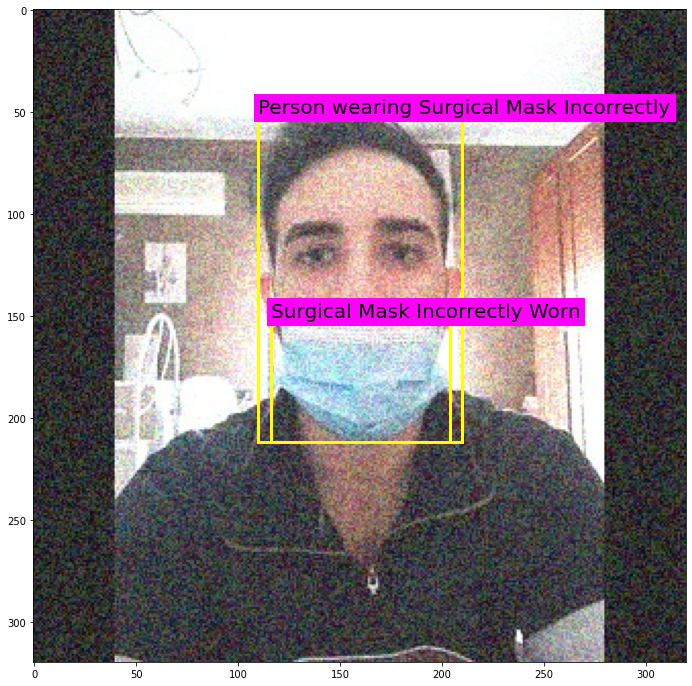

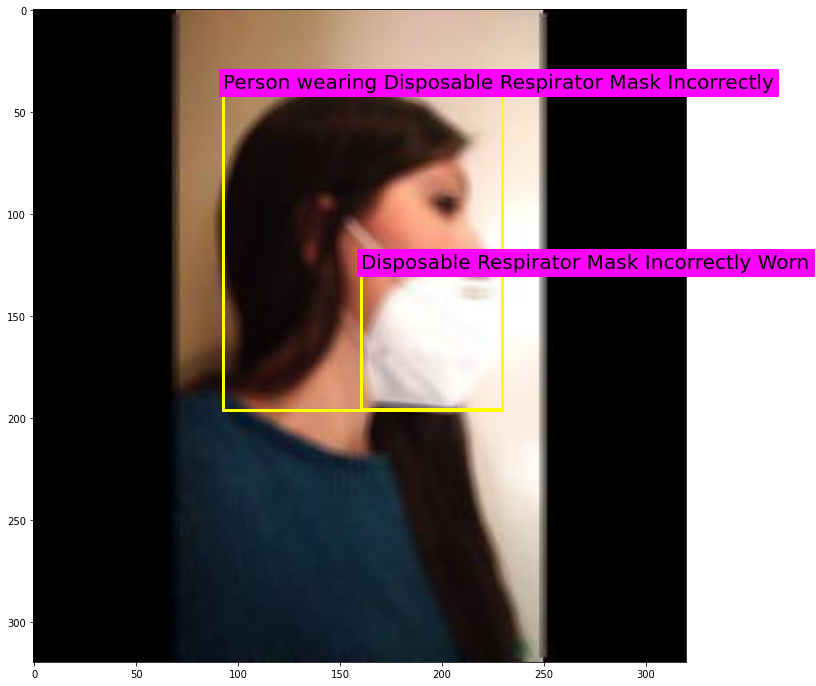

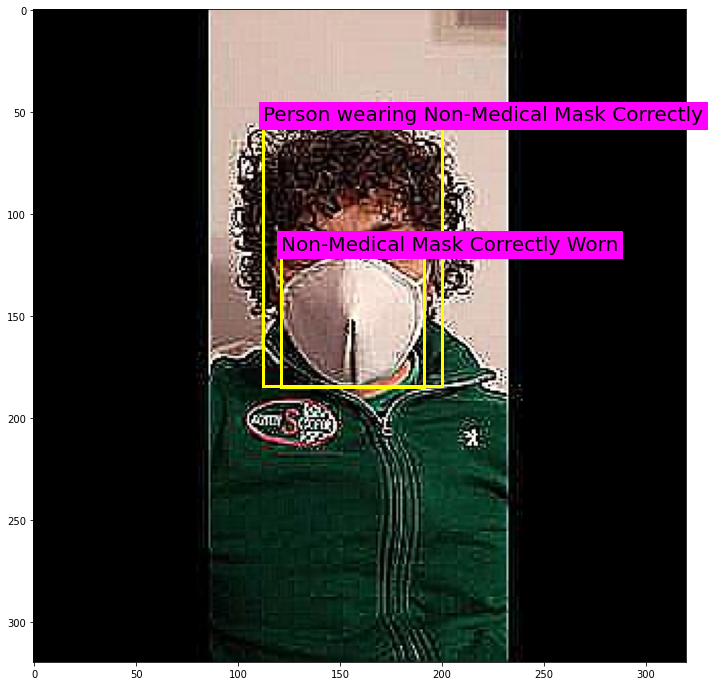

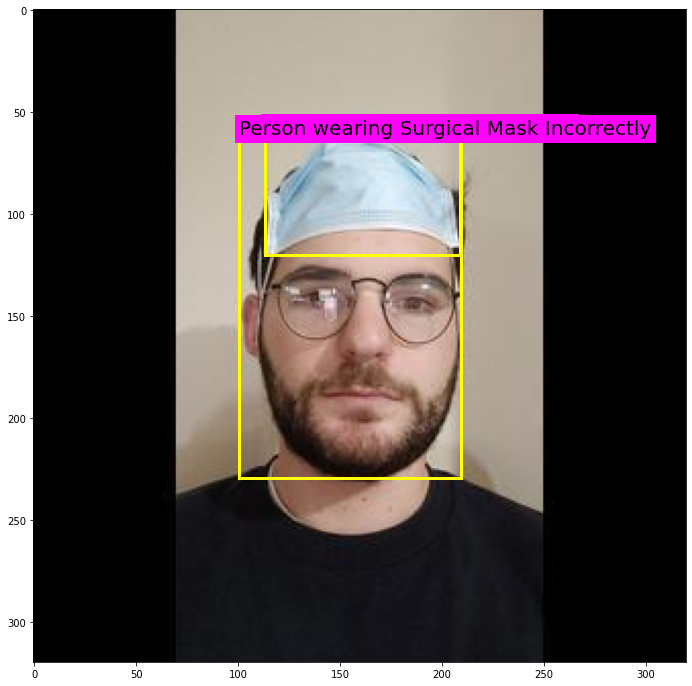

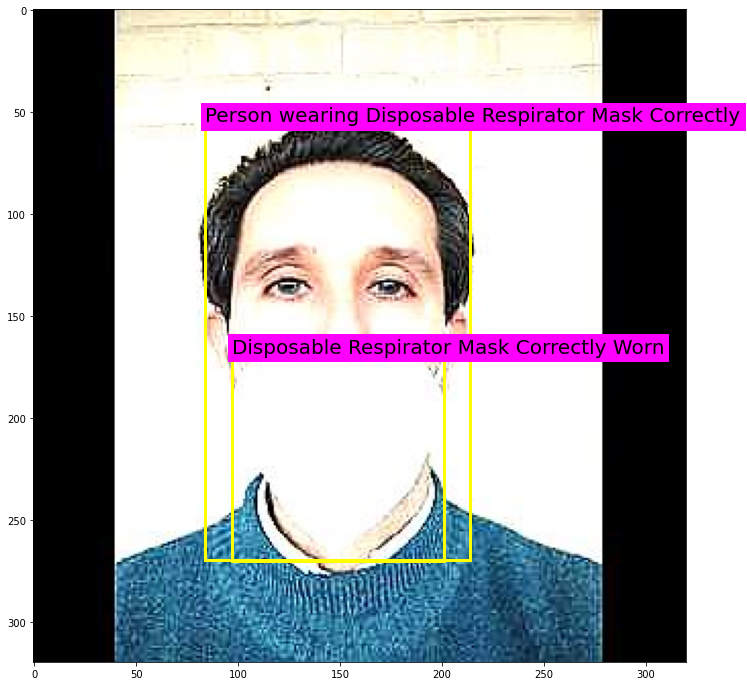

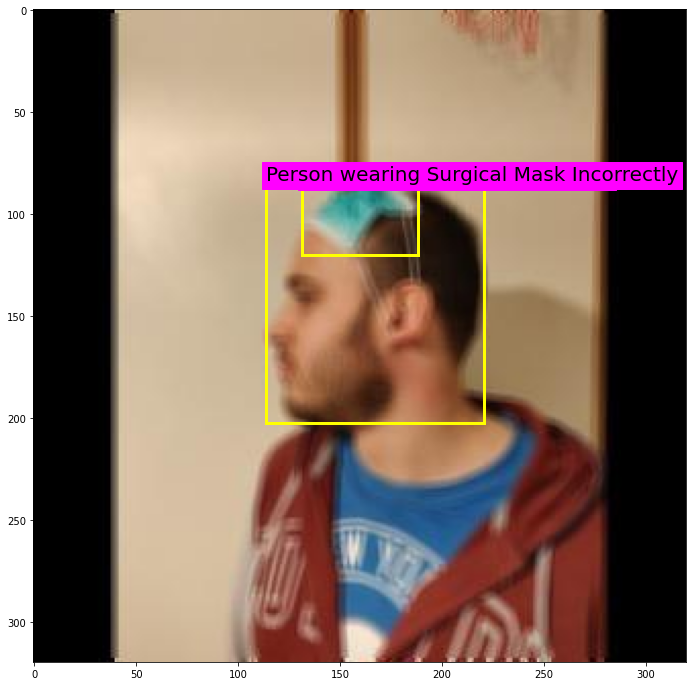

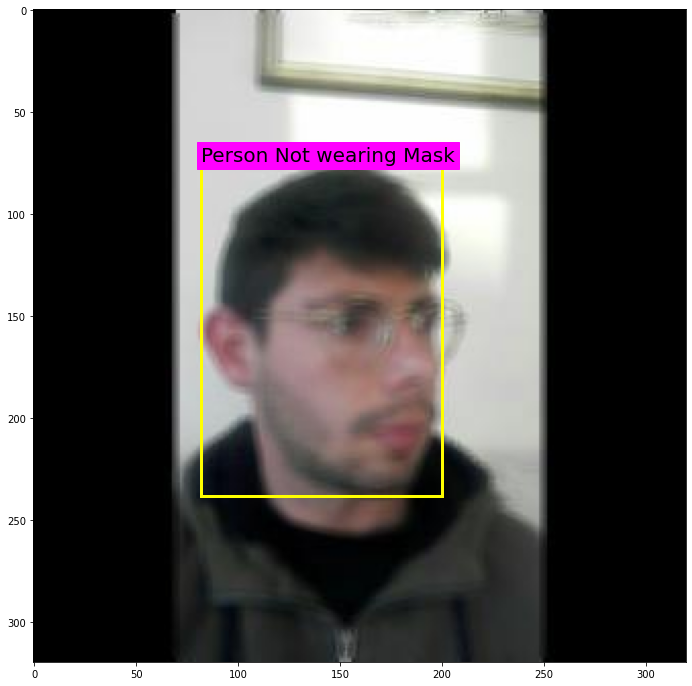

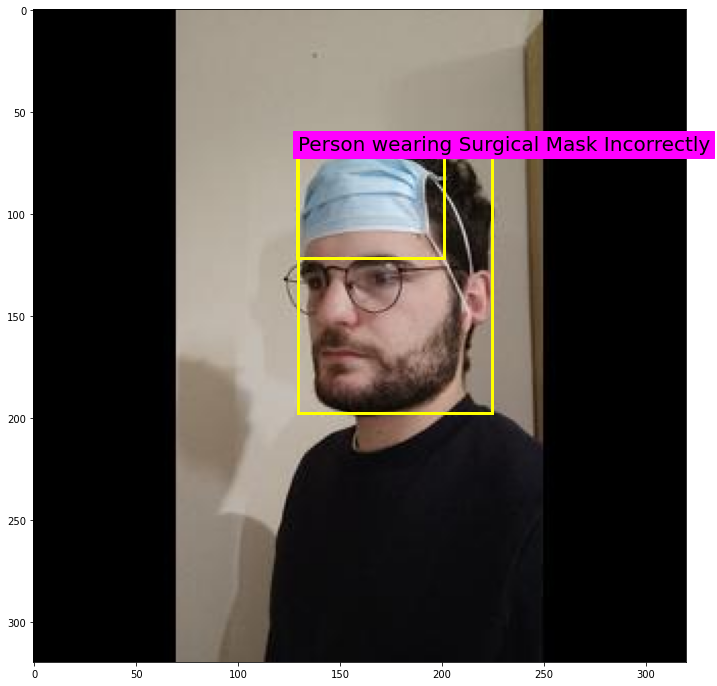

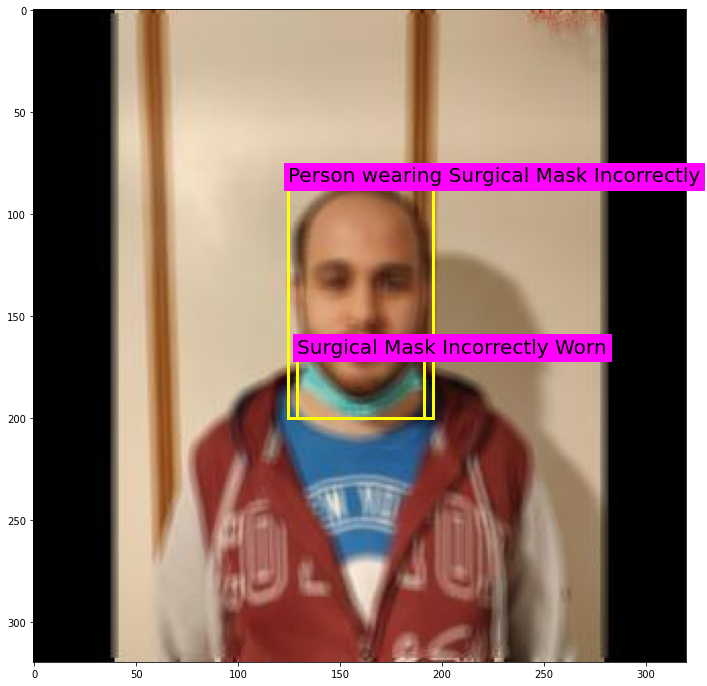

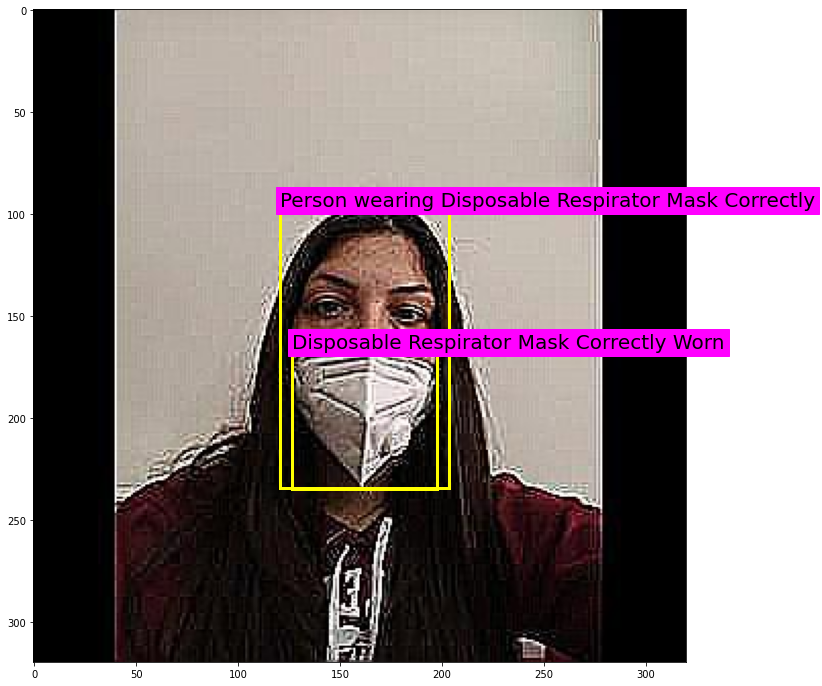

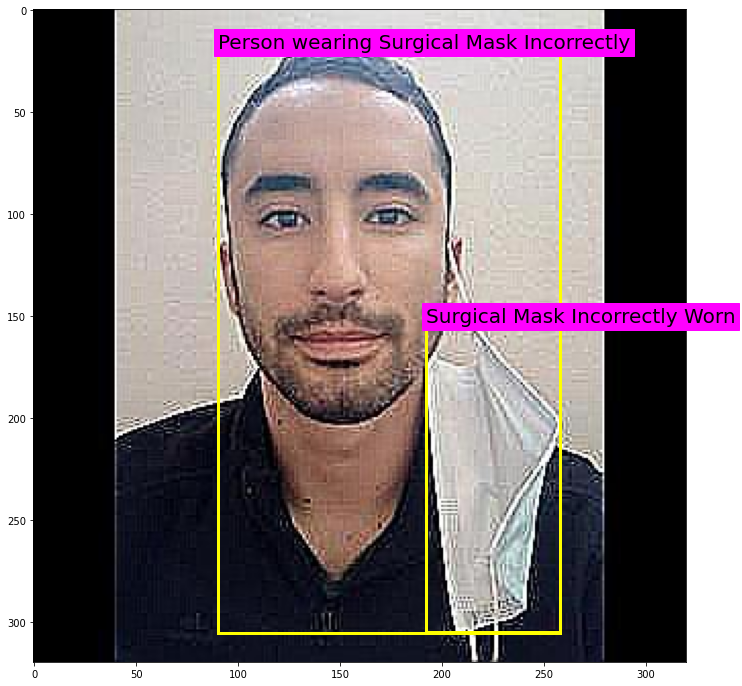

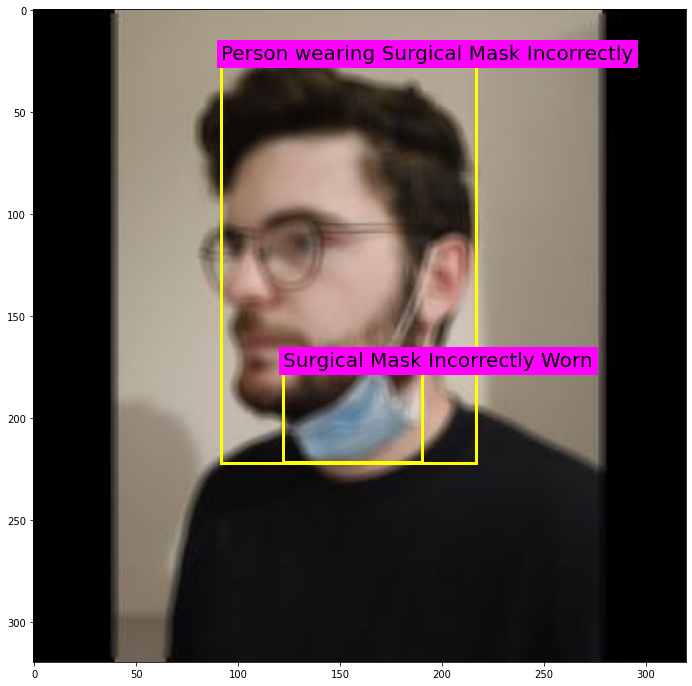

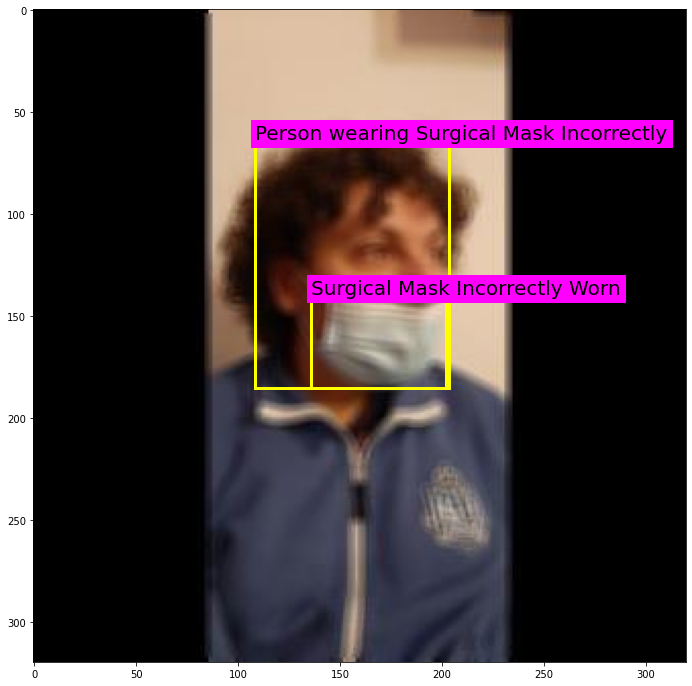

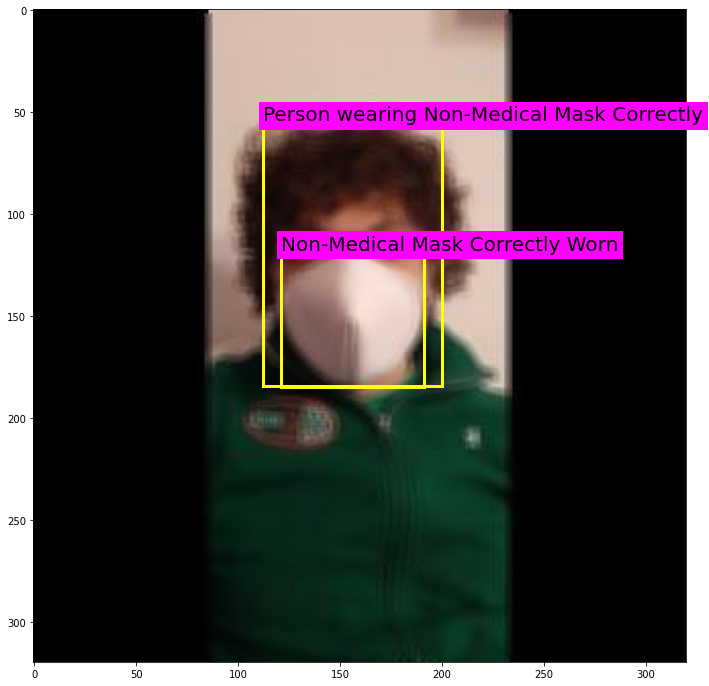

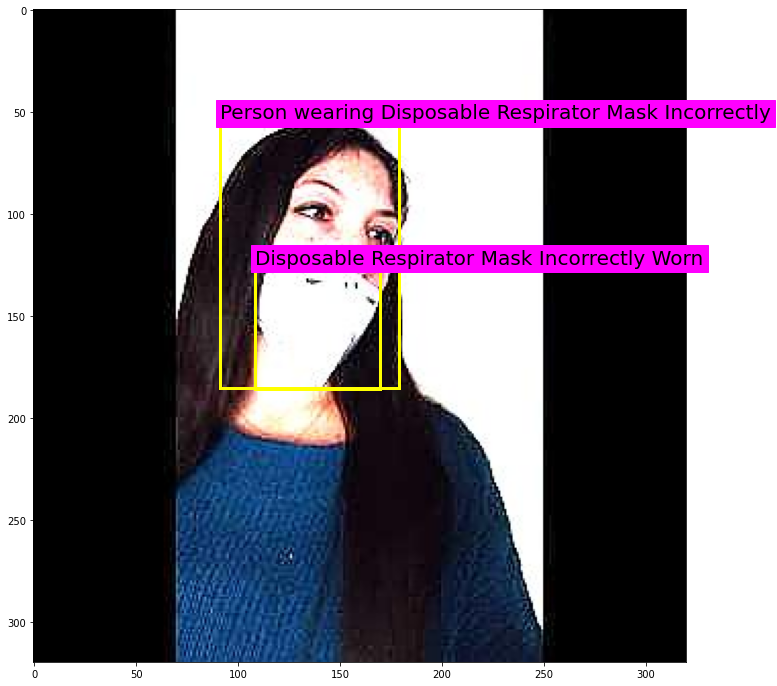

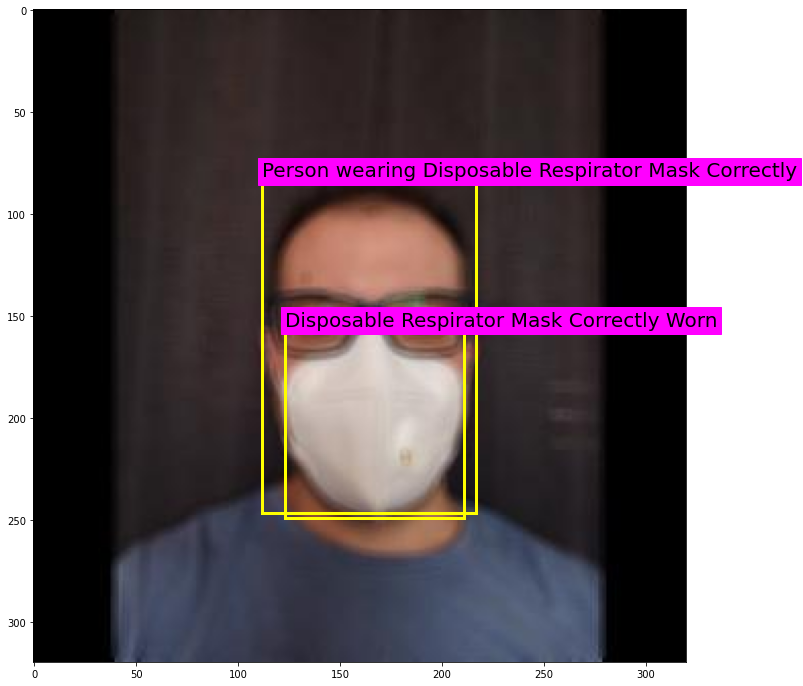

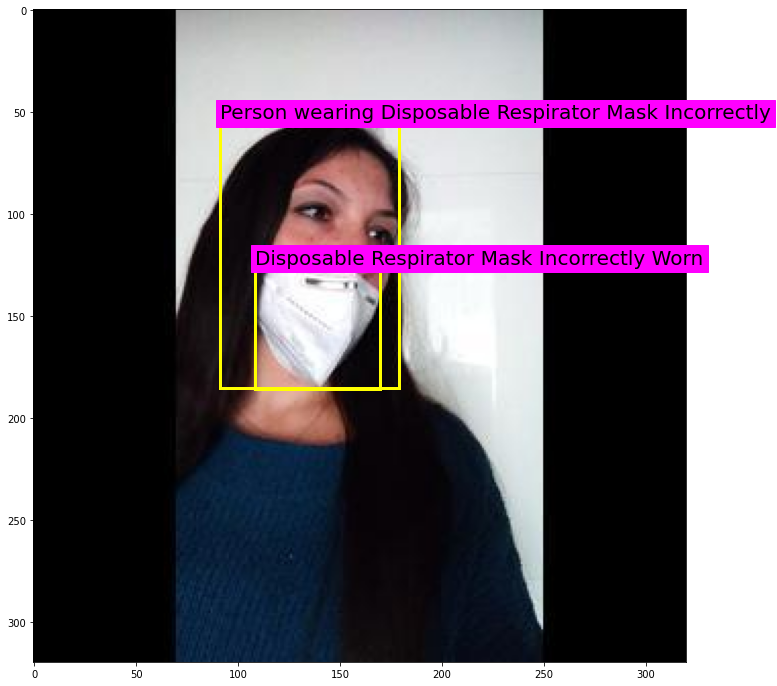

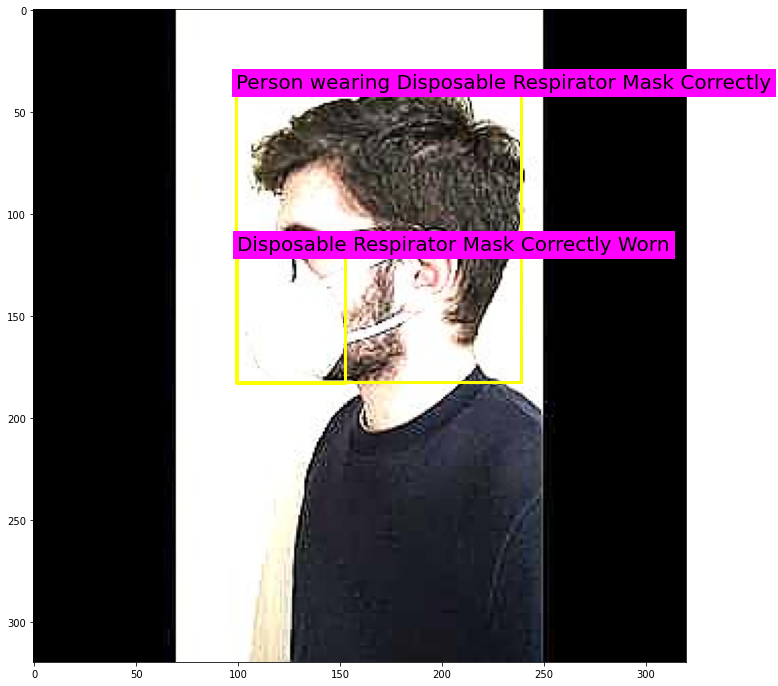

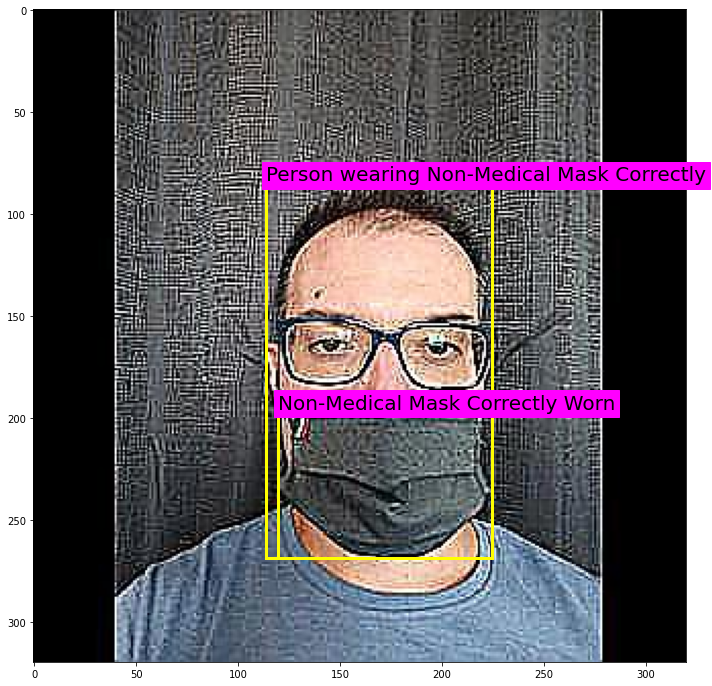

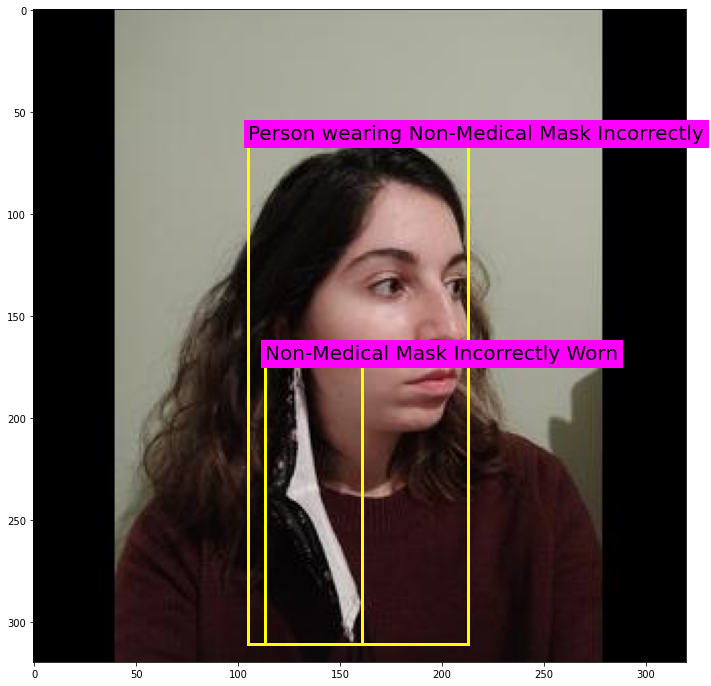

In [26]:
def plt_rectangle(plt,label,x1,y1,x2,y2):#define a function to plot a rectangle wit label
    linewidth = 3
    color = "yellow"
    plt.text(x1,y1,label,fontsize=20,backgroundcolor="magenta")
    plt.plot([x1,x1],[y1,y2], linewidth=linewidth,color=color)
    plt.plot([x2,x2],[y1,y2], linewidth=linewidth,color=color)
    plt.plot([x1,x2],[y1,y1], linewidth=linewidth,color=color)
    plt.plot([x1,x2],[y2,y2], linewidth=linewidth,color=color)

size = 20 # plot 20 images
ind_random = np.random.randint(0,len(file_name2),size=size) #randomly select 20 number in the limit of no of images
 #Define classes used in labelling images
classes = ["Person Not wearing Mask","Disposable Respirator Mask Correctly Worn","Non-Medical Mask Correctly Worn","Surgical Mask Correctly Worn","Disposable Respirator Mask Incorrectly Worn","Non-Medical Mask Incorrectly Worn","Surgical Mask Incorrectly Worn","Person wearing Disposable Respirator Mask Correctly","Person wearing Non-Medical Mask Correctly","Person wearing Surgical Mask Correctly","Person wearing Disposable Respirator Mask Incorrectly","Person wearing Non-Medical Mask Incorrectly","Person wearing Surgical Mask Incorrectly"]
for irow in ind_random:
    image = Image.open(r"C:\karthi\Projects\Mini project 2\Images\{}.jpg".format(file_name2[irow]))
    image = Iops.exif_transpose(image)
    plt.figure(figsize=(12,12))
    plt.imshow(image)
    lab = pd.read_csv(r"C:\karthi\Projects\Mini project 2\Labels\{}.txt".format(file_name2[irow]), delimiter = " ",header=None)
    for iplot in range(0,lab.shape[0]):
        x, y = image.size
        lab_cen_x = int(lab[1][iplot]*x)
        lab_cen_y = int(lab[2][iplot]*y)
        lab_width = int(lab[3][iplot]*x)
        lab_height = int(lab[4][iplot]*y)

        x1 = lab_cen_x - (lab_width / 2)
        x2 = lab_cen_x + (lab_width / 2)
        y1 = lab_cen_y - (lab_height / 2)
        y2 = lab_cen_y + (lab_height / 2)
        plt_rectangle(plt,
            label = classes[lab[0][iplot]],
            x1=x1,
            y1=y1,
            x2=x2,
            y2=y2)
    plt.show()

# Data Analysis using Visualization

In [18]:
final_df = []
for i in file_name2:
    row = OrderedDict()
    row["File_name"] = i
    row["img_width"] = 360
    row["img_height"] = 360
    lab = pd.read_csv(r"C:\karthi\Projects\Mini project 2\Labels\{}.txt".format(i), delimiter = " ",header=None)
    row["NO._of_labels"] = lab.shape[0]
    row["image_path"] = r"C:\karthi\Projects\Mini project 2\Images\{}.jpg".format(i)
    row ["label_path"] = r"C:\karthi\Projects\Mini project 2\Labels\{}.txt".format(i)
    for j in range(0,lab.shape[0]):
        row["box_{}_name".format(j)] = classes[lab[0][j]]
        row["box_{}_width".format(j)] = int(lab[3][j]*360)
        row["box_{}_height".format(j)] = int(lab[4][j]*360)
    final_df.append(row)
final_df =  pd.DataFrame(final_df)
final_df
final_df.to_csv("df_anno.csv",index=False)

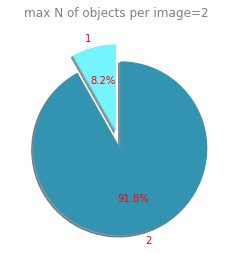

In [19]:
plt.pie(final_df.groupby("NO._of_labels").size(), labels = [1,2],explode = [0,0.2], autopct = '%.1f%%', colors = ["#74f4ff", "#3394b1"], shadow = True, startangle = 90, textprops = dict(color = "red"))
plt.title("max N of objects per image={}".format(2), color = "grey")
plt.show()

Counter({'Surgical Mask Incorrectly Worn': 1050, 'Person wearing Surgical Mask Incorrectly': 1050, 'Non-Medical Mask Incorrectly Worn': 702, 'Person wearing Non-Medical Mask Incorrectly': 630, 'Disposable Respirator Mask Incorrectly Worn': 528, 'Person wearing Disposable Respirator Mask Incorrectly': 528, 'Surgical Mask Correctly Worn': 372, 'Person wearing Surgical Mask Correctly': 372, 'Person Not wearing Mask': 276, 'Non-Medical Mask Correctly Worn': 252, 'Disposable Respirator Mask Correctly Worn': 228, 'Person wearing Disposable Respirator Mask Correctly': 228, 'Person wearing Non-Medical Mask Correctly': 228})


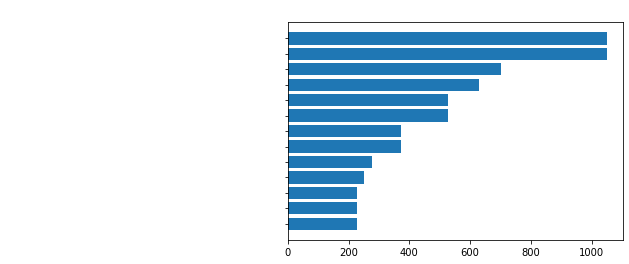

In [20]:
from collections import Counter
class_obj = []
for i in range(2):
    class_obj.extend(final_df["box_{}_name".format(i)].values)
class_obj = np.array(class_obj)

count = Counter(class_obj[class_obj != 'nan'])
print(count)

class_nm = list(count.keys())
class_count = list(count.values())
asort_class_count = np.argsort(class_count)
class_nm = np.array(class_nm)[asort_class_count]
class_count = np.array(class_count)[asort_class_count]
xs = range(len(class_count))
plt.barh(xs,class_count)
plt.yticks(xs,class_nm,color = "white")
plt.title("The number of objects per class: {} objects in total".format(len(count)), color = "white")
plt.show()


# Split Train and Test Data

In [28]:
directory_path = "C:\karthi\Projects\Mini project 2\Labels"
label_folder = glob.glob(directory_path+"/**/*.*", recursive = True)
label_folder

['C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0000-blur.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0000-bri.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0000-con.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0000-EEM.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0000-noise.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0000.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0045-blur.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0045-bri.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0045-con.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0045-EEM.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0045-noise.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_0045.txt',
 'C:\\karthi\\Projects\\Mini project 2\\Labels\\0001_MRCW_DRNV_009

In [29]:
directory_path = "C:\karthi\Projects\Mini project 2\Images"
img_folder = glob.glob(directory_path+"/**/*.*", recursive = True)
img_folder

['C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0000-blur.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0000-bri.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0000-con.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0000-EEM.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0000-noise.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0000.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0045-blur.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0045-bri.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0045-con.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0045-EEM.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0045-noise.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_0045.jpg',
 'C:\\karthi\\Projects\\Mini project 2\\Images\\0001_MRCW_DRNV_009

In [30]:
X_train,X_test = train_test_split(img_folder,test_size=0.3)


In [31]:
import shutil, os
for f in X_train: 
    shutil.copy(f, 'C:\karthi\Projects\Mini project 2\Train_test_datas\TRAIN\images')
for f in X_test:
    shutil.copy(f, 'C:\karthi\Projects\Mini project 2\Train_test_datas\Test\images')

In [32]:
for i in file_name2:
    for j in X_train:
        if i in j:
            shutil.copy("C:\karthi\Projects\Mini project 2\Labels\{}.txt".format(i),'C:\karthi\Projects\Mini project 2\Train_test_datas\Train\labels')
    for j in X_test:
        if i in j:
            shutil.copy("C:\karthi\Projects\Mini project 2\Labels\{}.txt".format(i),'C:\karthi\Projects\Mini project 2\Train_test_datas\Test\labels')